## 1. Imports

In [273]:
#import libraries
import numpy as np
import pandas as pd
import random
import sklearn as sk
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [274]:
#inport dataset
df_train = pd.read_csv("./surfing_train.csv")
df_test = pd.read_csv("./surfing_test.csv")

In [275]:
df_train.head()

,Id,Location,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,SafeToSurfTomorrow,Year,Day,Month
0,0,beachspot18,-2.2,4.8,0.2,NaN,NaN,SW,65.0,SW,WSW,28.0,30.0,88.0,75.0,NaN,NaN,NaN,NaN,1.5,2.3,No,No,2012,22,May
1,1,beachspot28,8.9,27.5,0.0,3.4,9.7,ESE,35.0,NaN,SSE,0.0,9.0,78.0,31.0,1016.0,1012.1,NaN,NaN,15.8,26.4,No,Yes,2010,5,April
2,2,beachspot36,6.3,21.2,0.0,5.8,11.1,NNE,37.0,NE,N,24.0,9.0,23.0,12.0,1025.5,1021.1,3.0,4.0,15.3,20.3,No,No,2010,30,September
3,3,beachspot3,19.7,26.8,7.2,2.4,2.9,SSW,39.0,ENE,SSW,9.0,20.0,93.0,76.0,1006.3,1007.1,8.0,7.0,22.0,24.4,Yes,No,2010,5,February
4,4,beachspot26,7.5,13.0,0.8,0.4,1.6,SSW,28.0,SSW,SSW,13.0,15.0,90.0,80.0,1030.1,1028.4,7.0,8.0,10.6,12.0,No,Yes,2010,22,September


In [276]:
print("df_test shape :",df_test.shape,"df_train shape :",df_train.shape)

df_test shape : (42658, 25) df_train shape : (99535, 26)


In [277]:
"""adding dummy column to df_test as 'SafeToSurfTomorrow' to mix train and test data to preprocess &
indicator column to segregate train and test data later"""
df_test['SafeToSurfTomorrow']='zz'
df_test['indicator']=0
df_train['indicator']=1
df = pd.concat([df_test, df_train])

In [278]:
df.describe()

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Day,indicator
count,142193.000000,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,72714.909116,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,15.715084,0.699999
std,41993.999136,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,8.798150,0.458259
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,0.000000
25%,36343.000000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,8.000000,0.000000
50%,72695.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,16.000000,1.000000
75%,109100.000000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,23.000000,1.000000
max,145459.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,31.000000,1.000000


## 2. Preprocessing

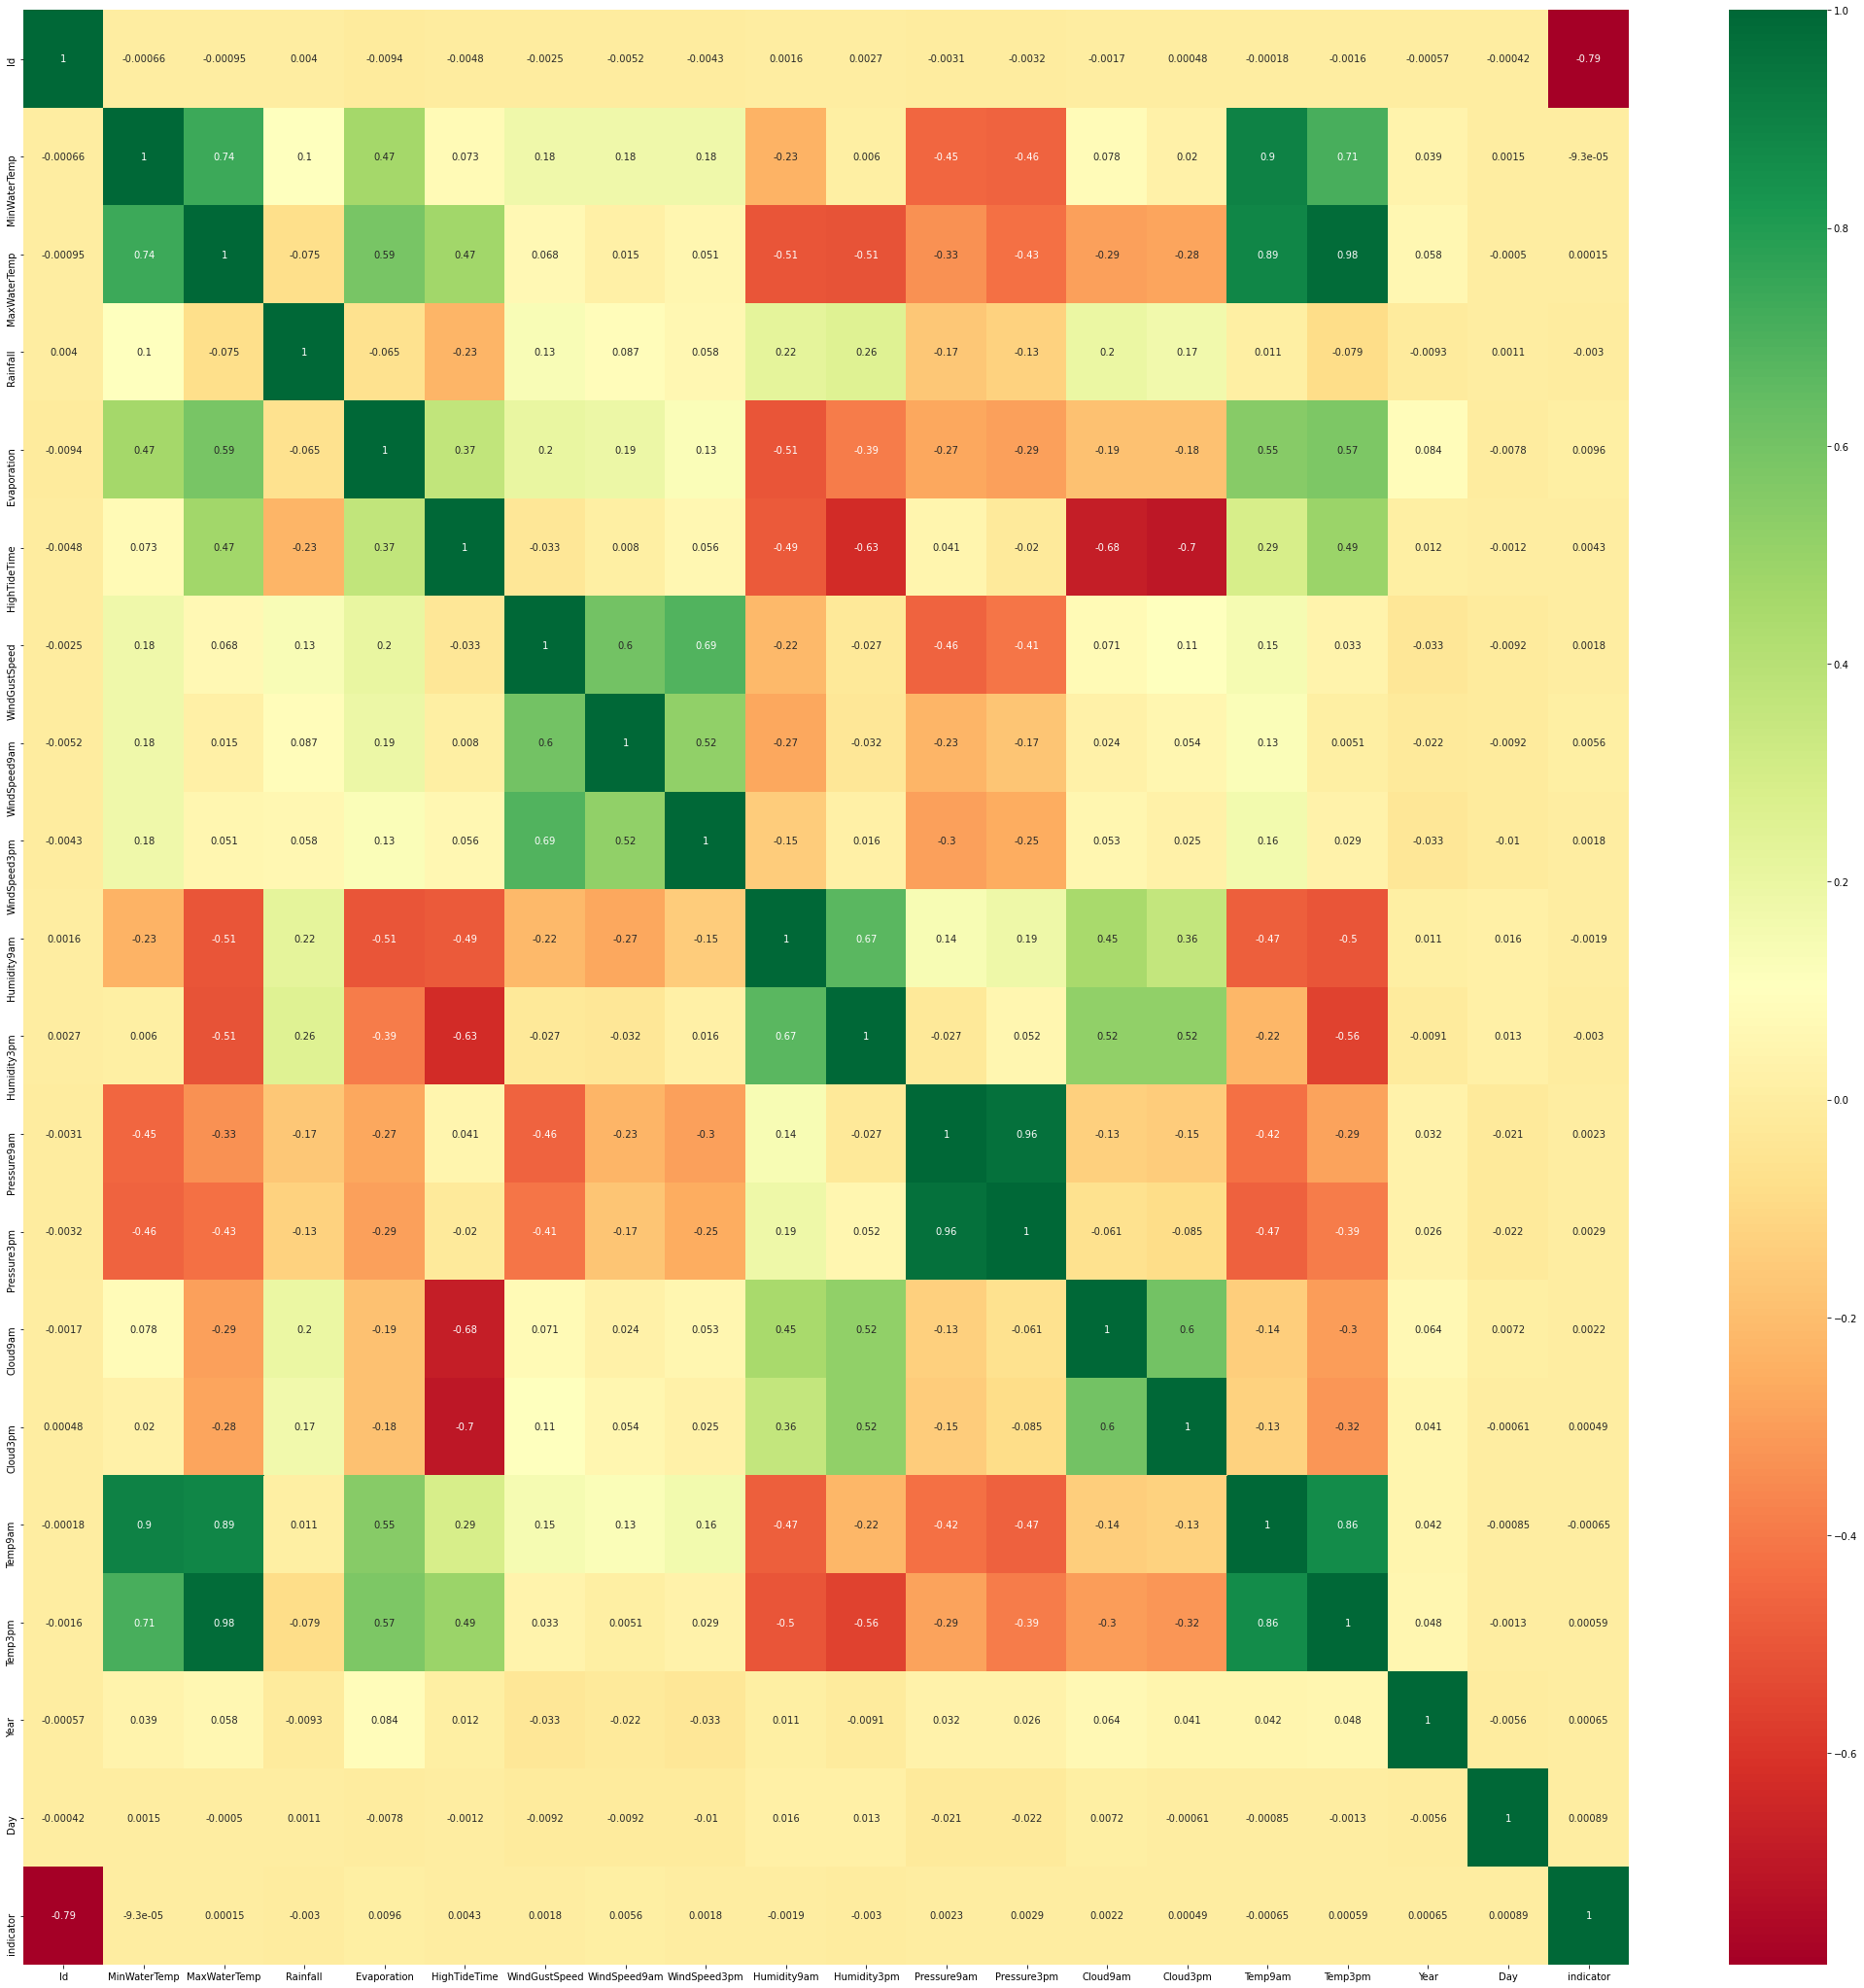

In [279]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(37,37))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [280]:
"""from correlation matrix we can see that their is no relation of day,
year and similarlly of month with target value hence excluding them"""

df.drop('Day', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)

In [281]:
df.isna().sum()

Id                        0
Location                  0
MinWaterTemp            637
MaxWaterTemp            322
Rainfall               1406
Evaporation           60843
HighTideTime          67816
WindGustDir            9330
WindGustSpeed          9270
WindDir9am            10013
WindDir3pm             3778
WindSpeed9am           1348
WindSpeed3pm           2630
Humidity9am            1774
Humidity3pm            3610
Pressure9am           14014
Pressure3pm           13981
Cloud9am              53657
Cloud3pm              57094
Temp9am                 904
Temp3pm                2726
SafeToSurfToday        1406
SafeToSurfTomorrow        0
indicator                 0
dtype: int64

In [282]:
dfmedian=df.median()
dfmode=df.mode()
dfmean=df.mean()

In [283]:
dfmean

Id               72714.909116
MinWaterTemp        12.186400
MaxWaterTemp        23.226784
Rainfall             2.349974
Evaporation          5.469824
HighTideTime         7.624853
WindGustSpeed       39.984292
WindSpeed9am        14.001988
WindSpeed3pm        18.637576
Humidity9am         68.843810
Humidity3pm         51.482606
Pressure9am       1017.653758
Pressure3pm       1015.258204
Cloud9am             4.437189
Cloud3pm             4.503167
Temp9am             16.987509
Temp3pm             21.687235
indicator            0.699999
dtype: float64

In [284]:
dfmedian

Id               72695.0
MinWaterTemp        12.0
MaxWaterTemp        22.6
Rainfall             0.0
Evaporation          4.8
HighTideTime         8.5
WindGustSpeed       39.0
WindSpeed9am        13.0
WindSpeed3pm        19.0
Humidity9am         70.0
Humidity3pm         52.0
Pressure9am       1017.6
Pressure3pm       1015.2
Cloud9am             5.0
Cloud3pm             5.0
Temp9am             16.7
Temp3pm             21.1
indicator            1.0
dtype: float64

In [285]:
""" Filling null values of continious features with mean as you can see from above mean and median their is no as much diff in mean and median"""

df["MinWaterTemp"].fillna(df["MinWaterTemp"].mean(), inplace=True)
df["MaxWaterTemp"].fillna(df["MaxWaterTemp"].mean(), inplace=True)
df["Rainfall"].fillna(df["Rainfall"].mean(), inplace=True)
df["Evaporation"].fillna(df["Evaporation"].mean(), inplace=True)
df["HighTideTime"].fillna(df["HighTideTime"].mean(), inplace=True)
df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean(), inplace=True)
df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean(), inplace=True)
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean(), inplace=True)
df["Humidity9am"].fillna(df["Humidity9am"].mean(), inplace=True)
df["Humidity3pm"].fillna(df["Humidity3pm"].mean(), inplace=True)
df["Pressure9am"].fillna(df["Pressure9am"].mean(), inplace=True)
df["Pressure3pm"].fillna(df["Pressure3pm"].mean(), inplace=True)
df["Cloud9am"].fillna(df["Cloud9am"].mean(), inplace=True)
df["Cloud3pm"].fillna(df["Cloud3pm"].mean(), inplace=True)
df["Temp9am"].fillna(df["Temp9am"].mean(), inplace=True)
df["Temp3pm"].fillna(df["Temp3pm"].mean(), inplace=True)

In [286]:
df.isnull().sum()

Id                        0
Location                  0
MinWaterTemp              0
MaxWaterTemp              0
Rainfall                  0
Evaporation               0
HighTideTime              0
WindGustDir            9330
WindGustSpeed             0
WindDir9am            10013
WindDir3pm             3778
WindSpeed9am              0
WindSpeed3pm              0
Humidity9am               0
Humidity3pm               0
Pressure9am               0
Pressure3pm               0
Cloud9am                  0
Cloud3pm                  0
Temp9am                   0
Temp3pm                   0
SafeToSurfToday        1406
SafeToSurfTomorrow        0
indicator                 0
dtype: int64

In [287]:
df['SafeToSurfToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [288]:
df['SafeToSurfToday'].mode()

0    No
dtype: object

In [289]:
#replacing categorical data with mode
df['SafeToSurfToday'] = df['SafeToSurfToday'].fillna('No')

In [290]:
df['SafeToSurfToday'].unique()

array(['No', 'Yes'], dtype=object)

In [291]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'SafeToSurfToday'
df['SafeToSurfToday']= label_encoder.fit_transform(df['SafeToSurfToday'])
df['SafeToSurfToday'].unique()

array([0, 1])

In [292]:
# Encode labels in column ''SafeToSurfTomorrow''.
df['SafeToSurfTomorrow']= label_encoder.fit_transform(df['SafeToSurfTomorrow'])
df['SafeToSurfTomorrow'].unique()
#list(label_encoder.inverse_transform([2, 2, 1]))

array([2, 0, 1])

In [293]:
df

,Id,Location,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,SafeToSurfTomorrow,indicator
0,101804,beachspot23,9.7,19.2,0.8,7.600000,4.100000,WNW,69.000000,N,NW,43.0,37.0,62.0,28.0,995.400000,992.000000,7.000000,7.000000,10.7,19.2,0,2,0
1,101805,beachspot37,10.2,21.4,0.8,3.200000,10.700000,NaN,39.984292,ESE,ESE,11.0,28.0,57.0,62.0,1023.300000,1019.700000,6.000000,1.000000,16.1,17.4,0,2,0
2,101806,beachspot46,21.5,39.9,0.0,13.200000,11.500000,E,33.000000,NE,ENE,13.0,19.0,16.0,13.0,1007.700000,1004.900000,2.000000,3.000000,33.2,38.2,0,2,0
3,101807,beachspot31,23.3,28.8,23.2,5.469824,7.624853,ESE,43.000000,SE,SE,33.0,26.0,71.0,70.0,1021.300000,1018.600000,4.437189,4.503167,25.3,25.8,1,2,0
4,101808,beachspot16,8.7,25.6,0.0,5.469824,7.624853,NW,50.000000,NaN,NNW,0.0,28.0,69.0,38.0,1022.300000,1017.700000,6.000000,6.000000,14.3,24.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99530,101799,beachspot42,8.6,18.7,5.6,5.469824,7.624853,W,56.000000,W,W,26.0,19.0,58.0,44.0,1017.653758,1015.258204,4.437189,4.503167,13.0,18.3,1,0,1
99531,101800,beachspot4,7.9,25.0,0.0,2.800000,10.200000,SSW,35.000000,WSW,S,2.0,20.0,52.0,47.0,1020.700000,1019.100000,1.000000,1.000000,19.5,22.0,0,0,1
99532,101801,beachspot35,3.9,20.4,0.0,4.000000,11.500000,SW,44.000000,NNE,WSW,11.0,26.0,86.0,41.0,1016.700000,1015.600000,3.000000,4.000000,10.9,19.3,0,0,1
99533,101802,beachspot10,24.3,44.4,0.0,11.800000,7.624853,WNW,59.000000,WNW,ESE,35.0,43.0,28.0,40.0,1005.300000,1004.200000,4.437189,4.503167,37.6,32.9,0,0,1


In [294]:
#one-hot encoding for categorical data 
column_names_to_one_hot = ["Location","WindGustDir", "WindDir9am","WindDir3pm"]
df = pd.get_dummies(df, columns=column_names_to_one_hot)
df.head()

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,SafeToSurfTomorrow,indicator,Location_beachspot1,Location_beachspot10,Location_beachspot11,Location_beachspot12,Location_beachspot13,Location_beachspot14,Location_beachspot15,Location_beachspot16,Location_beachspot17,Location_beachspot18,Location_beachspot19,Location_beachspot2,Location_beachspot20,Location_beachspot21,Location_beachspot22,Location_beachspot23,Location_beachspot24,Location_beachspot25,Location_beachspot26,Location_beachspot27,Location_beachspot28,Location_beachspot29,Location_beachspot3,Location_beachspot30,Location_beachspot31,Location_beachspot32,Location_beachspot33,Location_beachspot34,Location_beachspot35,Location_beachspot36,Location_beachspot37,Location_beachspot38,Location_beachspot39,Location_beachspot4,Location_beachspot40,Location_beachspot41,Location_beachspot42,Location_beachspot43,Location_beachspot44,Location_beachspot45,Location_beachspot46,Location_beachspot47,Location_beachspot48,Location_beachspot49,Location_beachspot5,Location_beachspot6,Location_beachspot7,Location_beachspot8,Location_beachspot9,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,101804,9.7,19.2,0.8,7.600000,4.100000,69.000000,43.0,37.0,62.0,28.0,995.4,992.0,7.000000,7.000000,10.7,19.2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,101805,10.2,21.4,0.8,3.200000,10.700000,39.984292,11.0,28.0,57.0,62.0,1023.3,1019.7,6.000000,1.000000,16.1,17.4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,101806,21.5,39.9,0.0,13.200000,11.500000,33.000000,13.0,19.0,16.0,13.0,1007.7,1004.9,2.000000,3.000000,33.2,38.2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,101807,23.3,28.8,23.2,5.469824,7.624853,43.000000,33.0,26.0,71.0,70.0,1021.3,1018.6,4.437189,4.503167,25.3,25.8,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,101808,8.7,25.6,0.0,5.469824,7.624853,50.000000,0.0,28.0,69.0,38.0,1022.3,1017.7,6.000000,6.000000,14.3,24.0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [295]:
df

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,SafeToSurfTomorrow,indicator,Location_beachspot1,Location_beachspot10,Location_beachspot11,Location_beachspot12,Location_beachspot13,Location_beachspot14,Location_beachspot15,Location_beachspot16,Location_beachspot17,Location_beachspot18,Location_beachspot19,Location_beachspot2,Location_beachspot20,Location_beachspot21,Location_beachspot22,Location_beachspot23,Location_beachspot24,Location_beachspot25,Location_beachspot26,Location_beachspot27,Location_beachspot28,Location_beachspot29,Location_beachspot3,Location_beachspot30,Location_beachspot31,Location_beachspot32,Location_beachspot33,Location_beachspot34,Location_beachspot35,Location_beachspot36,Location_beachspot37,Location_beachspot38,Location_beachspot39,Location_beachspot4,Location_beachspot40,Location_beachspot41,Location_beachspot42,Location_beachspot43,Location_beachspot44,Location_beachspot45,Location_beachspot46,Location_beachspot47,Location_beachspot48,Location_beachspot49,Location_beachspot5,Location_beachspot6,Location_beachspot7,Location_beachspot8,Location_beachspot9,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,101804,9.7,19.2,0.8,7.600000,4.100000,69.000000,43.0,37.0,62.0,28.0,995.400000,992.000000,7.000000,7.000000,10.7,19.2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,101805,10.2,21.4,0.8,3.200000,10.700000,39.984292,11.0,28.0,57.0,62.0,1023.300000,1019.700000,6.000000,1.000000,16.1,17.4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,101806,21.5,39.9,0.0,13.200000,11.500000,33.000000,13.0,19.0,16.0,13.0,1007.700000,1004.900000,2.000000,3.000000,33.2,38.2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,101807,23.3,28.8,23.2,5.469824,7.624853,43.000000,33.0,26.0,71.0,70.0,1021.300000,1018.600000,4.437189,4.503167,25.3,25.8,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,101808,8.7,25.6,0.0,5.469824,7.624853,50.000000,0.0,28.0,69.0,38.0,1022.300000,1017.700000,6.000000,6.000000,14.3,24.0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [296]:
df.isnull().sum()

Id                0
MinWaterTemp      0
MaxWaterTemp      0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 117, dtype: int64

## 3. feature scaling

In [297]:
# splitting feature variables and target variables for scaling
df_newY = pd.DataFrame(df['SafeToSurfTomorrow'])
df_newX = df.drop('SafeToSurfTomorrow', axis=1)

In [298]:
#robust scaling is used to handle outliers
scaler = RobustScaler()
df_newX = pd.DataFrame(scaler.fit_transform(df_newX), columns=df_newX.columns)

## 4. splitting data train test set

In [299]:
X_train_df = df_newX[df_newX["indicator"] == 0]
X_test_df = df_newX[df_newX["indicator"] == -1]

In [300]:
X_train_df

,Id,MinWaterTemp,MaxWaterTemp,Rainfall,Evaporation,HighTideTime,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,SafeToSurfToday,indicator,Location_beachspot1,Location_beachspot10,Location_beachspot11,Location_beachspot12,Location_beachspot13,Location_beachspot14,Location_beachspot15,Location_beachspot16,Location_beachspot17,Location_beachspot18,Location_beachspot19,Location_beachspot2,Location_beachspot20,Location_beachspot21,Location_beachspot22,Location_beachspot23,Location_beachspot24,Location_beachspot25,Location_beachspot26,Location_beachspot27,Location_beachspot28,Location_beachspot29,Location_beachspot3,Location_beachspot30,Location_beachspot31,Location_beachspot32,Location_beachspot33,Location_beachspot34,Location_beachspot35,Location_beachspot36,Location_beachspot37,Location_beachspot38,Location_beachspot39,Location_beachspot4,Location_beachspot40,Location_beachspot41,Location_beachspot42,Location_beachspot43,Location_beachspot44,Location_beachspot45,Location_beachspot46,Location_beachspot47,Location_beachspot48,Location_beachspot49,Location_beachspot5,Location_beachspot6,Location_beachspot7,Location_beachspot8,Location_beachspot9,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
42658,-0.999148,-1.543478,-1.737864,0.25,0.000000,0.000000,1.733333,1.250000,1.032948,0.692308,0.839907,0.000000,0.000000,0.000000,0.000000,-1.663043,-1.979167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42659,-0.999134,-0.336957,0.466019,0.00,-1.408212,1.930105,-0.266667,-1.083333,-0.876143,0.307692,-0.731522,-0.199248,-0.375977,0.000000,0.000000,-0.108696,0.531250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42660,-0.999120,-0.619565,-0.145631,0.00,0.224636,3.232253,-0.133333,0.916667,-0.876143,-1.807692,-1.410093,0.945330,0.695452,-0.479063,-0.251583,-0.163043,-0.104167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42661,-0.999107,0.836957,0.398058,9.00,-2.088566,-4.394612,0.000000,-0.333333,0.123857,0.884615,0.875621,-1.367923,-0.971215,1.187604,1.248417,0.565217,0.322917,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [301]:
""" Dropping column we added explicity to merge train and test data at start for preprocessing"""
X_train_df.drop(axis="columns", labels="indicator", inplace=True) 
X_test_df.drop(axis="columns", labels="indicator", inplace=True) 
X_train_df.drop(axis="columns", labels="Id", inplace=True) 
X_test_df.drop(axis="columns", labels="Id", inplace=True) 

C:\Users\Vishwa\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [302]:
# segregating train_target from train and dummy test merge
Y_train_df = df_newY[df_newY["SafeToSurfTomorrow"] != 2]

## 4. Model

In [310]:
"""using logistic regression"""
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 1200)

# fit the model with data
logreg.fit(X_train_df,Y_train_df)

#[:,1] this is applied to take positive probablities
y_pred_logreg=logreg.predict_proba(X_test_df)[:,1]

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [312]:
y_pred_logreg

array([0.53985693, 0.04827216, 0.00946017, ..., 0.12972081, 0.17666251,
       0.22289194])

In [313]:
df_test["SafeToSurfTomorrow"] =y_pred_logreg
submission_log = df_test[["Id","SafeToSurfTomorrow"]]
submission_log.to_csv("WOlog1.csv",index=False)